# Title

To Cover:
- blah
- blah
- blah

In [ ]:
E (x - mu) (x - mu)^T = E x x^T - E x mu^T - E mu x^T + E mu mu^T = E xx^T - mu mu^T

In [ ]:
E(x - mu)^2 = E x^2 - 2 E x * mu + E mu^2 = E x^2 - mu^2

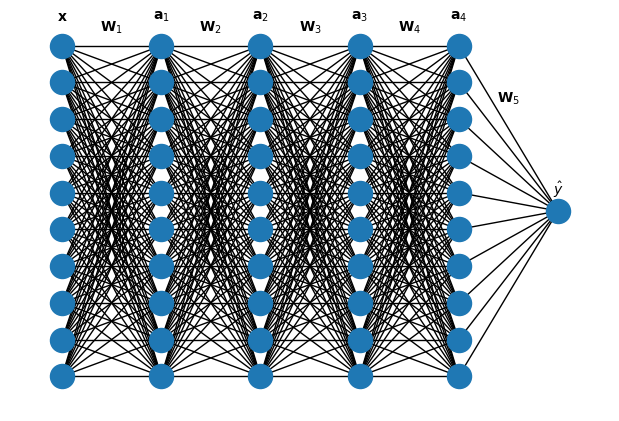

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network(neurons_per_layer, layer_names=None, weight_names=None, 
                        layer_offset=0.5, weight_offset=0.5):
    if not isinstance(layer_offset, list):
        layer_offset = [layer_offset] * len(neurons_per_layer)
    if not isinstance(weight_offset, list):
        weight_offset = [weight_offset] * (len(neurons_per_layer) - 1)  
    G = nx.Graph()
    plt.figure(figsize=(6, 4))
    # add nodes
    for i, n in enumerate(neurons_per_layer):
        for j in range(n):
            G.add_node(f'{i}_{j}', pos=(i, j - (n - 1) / 2))
    # add edges
    for i, n in enumerate(neurons_per_layer[: -1]):
        for j in range(n):
            for k in range(neurons_per_layer[i + 1]):
                G.add_edge(f'{i}_{j}', f'{i + 1}_{k}')
    # draw network
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=False)
    # add label names
    if layer_names is not None:
        for i, name in enumerate(layer_names):
            y_offset = neurons_per_layer[i] / 5 
            y_offset += layer_offset[i] * y_offset
            plt.text(i, y_offset, name, ha='center', va='center')
    # add edge names
    if weight_names is not None:
        for i, name in enumerate(weight_names):
            x_offset = i + 0.5
            y_offset = (neurons_per_layer[i] + neurons_per_layer[i + 1]) / 5 
            y_offset += weight_offset[i] * y_offset
            plt.text(x_offset, y_offset, name, ha='center', va='center')
    plt.show()

layers = [10] * 5 + [1]
layer_names = ['$\mathbf{x}$'] + [f'$\mathbf{{a}}_{i + 1}$' for i in range(len(layers[1: -1]))] + ['$\hat y$']
weight_names = [f'$\mathbf{{W}}_{i + 1}$' for i in range(len(layers[: -1]))]
layer_offset = [1.65] * 5 + [2.0]
weight_offset = [0.25] * 4 + [0.4]
draw_neural_network(layers, layer_names=layer_names, weight_names=weight_names, 
                    layer_offset=layer_offset, weight_offset=weight_offset)